## Task 1

### Loading Data set

In [ ]:
# Installing the required libraries
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi


# Importing all  the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import os
import dask.dataframe as dd

Files are stored within folders.The folder structure is :    
FDA_Project2 / Project2 / Subject1 ,Subject2.....Subject15 / acc_walking_chest,acc_walking_head inside each subject 

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

# Providing files path
location_path = '/content/drive/MyDrive/Colab Notebooks/FDA_Project2/Project2/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Creating a function to load all the required csv files stored within the folders and subfolders :

def Storing_locations(dataset_location):
  #Creating a empty list to store the path of each csv file
  datasets = []
  #Iterating through the folderof each subject ,then each activity files and then selecting only head and chest csv files
  for subject in os.listdir(dataset_location):
      if subject != ".DS_Store":
          for activity in os.listdir(dataset_location+subject):
              if activity != ".DS_Store":
                  for location in os.listdir(dataset_location+subject+"/"+activity+"/"):
                      if ('chest' in location) | ('head' in location):                         #Selecting only chest and head files
                          file_location = dataset_location+subject+"/"+activity+"/"+location
                          datasets = datasets + [file_location]  # concatinating the list

  return datasets
datasets = Storing_locations(location_path)

In [6]:
len(datasets)

120

There are 120 files for 15 subjects for 4 activities and 2 body locations for each subject

### STEP 2 : Creating functions to apply NVG and HVG

**Natural Visibility Graph**<br>
A visibility graph is obtained from the mapping of a time
series into a network according to the following visibility criterion: Two arbitrary data (ta, ya) and (tb, yb) in the time
series have visibility, and consequently become two nodes in the associated graph, if any other data (tc, yc) such that
ta < tc < tb fulfills<br>
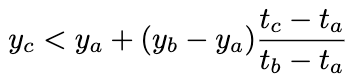



**Horizontal Visibility Graph**<br>
The horizontal visibility algorithm maps time series into graphs and it is defined as follows.<br> Let {xi}i=1..N be a time
series of N data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph
from now on). Two nodes i and j in the graph are connected if one can draw a horizontal line in the time series joining
xi and xj that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, i and
j are two connected nodes if the following geometrical criterion is fulfilled within the time series:<br>
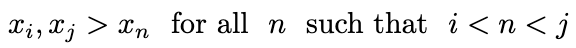

In [7]:
#CREATING A FUNCTION TO CALCULATE Average Degree, Network Diameter, and Average Path Length

def computations(model_type,stored_values):
  stored_values['Average_Degree'] = np.mean(model_type.degree())  #calculating average degree for each model NVG and HVG
  stored_values['Network_Diameter'] = model_type.diameter()       #calculating diameter for each model NVG and HVG      
  stored_values['Average_Path_Length'] = model_type.average_path_length()   #calculating average path length for each model NVG and HVG
  return stored_values                                                      #returns a dictionary with variables

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)                   

def Visibility_Graph(df, subject, activity, location, result_output):
  #creating a dictionary to store the variables and rows
  stored_values = {}
  
  #Adding subject,activity and body location from the file location path 
  stored_values['Subject'] = str(subject[7:])           
  stored_values['Activity'] = activity
  stored_values['Location'] = location.split('_')[2].split('.')[0]

  # Adding a for loop to iterate through each axis for each computation 
  for i in ['x','y','z']:
    column = 'attr_'+i
    #adding a variable to the dictionary
    stored_values['Accelerometer_axis'] = i

    # Applying  Natural Visibility Graph
    stored_values['Method'] = 'NVG'                   #Adding variable method to the dictionary
    #Applying NVG from ts2vg library for each axis
    NVG = NaturalVG()                                 
    NVG.build(df[column])
    NVG_graph= NVG.as_igraph()
    #Computing for NVG method 
    stored_values = computations(NVG_graph, stored_values)
    #Storing it to a new dataframe
    result_output = result_output.append(stored_values, ignore_index=True)

    # Applying  Horizontal Visibility Graph
    stored_values['Method'] = 'HVG'                        #Adding variable method to the dictionary
    #Applying NVG from ts2vg library for each axis
    HVG = HorizontalVG()
    HVG.build(df[column])
    HVG_graph = HVG.as_igraph()
    #Computing for NVG method 
    stored_values = computations(HVG_graph, stored_values)
    #Storing it to a new dataframe
    result_output = result_output.append(stored_values, ignore_index=True)

  return result_output

In [13]:
#Creating a new dataframe
result_dataframe = pd.DataFrame()
#Counting the number of files
count = 0

# Passing one one file to the visibilty graph functions using a loop 
for file_location in datasets:
  #selectING  sample size of 1024 data points ( from 1000 to 2024) for each of the 15 time series
  df = pd.read_csv(file_location).iloc[1000:2024,:][['attr_x','attr_y','attr_z']]
  print("Fecthing File ", count)
  result_dataframe = Visibility_Graph(df, file_location.split('/')[7], file_location.split('/')[8], file_location.split('/')[9], result_dataframe)
  count = count + 1

Fecthing File  0
Fecthing File  1
Fecthing File  2
Fecthing File  3
Fecthing File  4
Fecthing File  5
Fecthing File  6
Fecthing File  7
Fecthing File  8
Fecthing File  9
Fecthing File  10
Fecthing File  11
Fecthing File  12
Fecthing File  13
Fecthing File  14
Fecthing File  15
Fecthing File  16
Fecthing File  17
Fecthing File  18
Fecthing File  19
Fecthing File  20
Fecthing File  21
Fecthing File  22
Fecthing File  23
Fecthing File  24
Fecthing File  25
Fecthing File  26
Fecthing File  27
Fecthing File  28
Fecthing File  29
Fecthing File  30
Fecthing File  31
Fecthing File  32
Fecthing File  33
Fecthing File  34
Fecthing File  35
Fecthing File  36
Fecthing File  37
Fecthing File  38
Fecthing File  39
Fecthing File  40
Fecthing File  41
Fecthing File  42
Fecthing File  43
Fecthing File  44
Fecthing File  45
Fecthing File  46
Fecthing File  47
Fecthing File  48
Fecthing File  49
Fecthing File  50
Fecthing File  51
Fecthing File  52
Fecthing File  53
Fecthing File  54
Fecthing File  55
Fe

In [14]:
#Tabulating the final output 
result_dataframe

,Subject,Activity,Location,Accelerometer_axis,Method,Average_Degree,Network_Diameter,Average_Path_Length
0,6,climbingup,chest,x,NVG,13.509766,9,4.209383
1,6,climbingup,chest,x,HVG,3.955078,32,13.887962
2,6,climbingup,chest,y,NVG,12.925781,8,4.364419
3,6,climbingup,chest,y,HVG,3.968750,29,11.995895
4,6,climbingup,chest,z,NVG,10.583984,10,5.075895
...,...,...,...,...,...,...,...,...
715,12,climbingup,head,x,HVG,3.964844,27,12.850356
716,12,climbingup,head,y,NVG,12.460938,12,4.567279
717,12,climbingup,head,y,HVG,3.945312,38,15.303931
718,12,climbingup,head,z,NVG,15.419922,11,4.357901


In [18]:
#Checking unique values in the result output
result_dataframe['Subject'].unique()

array(['6', '8', '3', '2', '15', '4', '9', '14', '5', '7', '11', '10',
       '13', '1', '12'], dtype=object)

In [16]:
result_dataframe['Activity'].unique()

array(['climbingup', 'walking', 'running', 'climbingdown'], dtype=object)

In [17]:
result_dataframe['Accelerometer_axis'].unique()

array(['x', 'y', 'z'], dtype=object)

### STEP 3 : Generating Scatter Plots 

### Method - HVG

PLOT 1 : HVG WALKING AND RUNNING

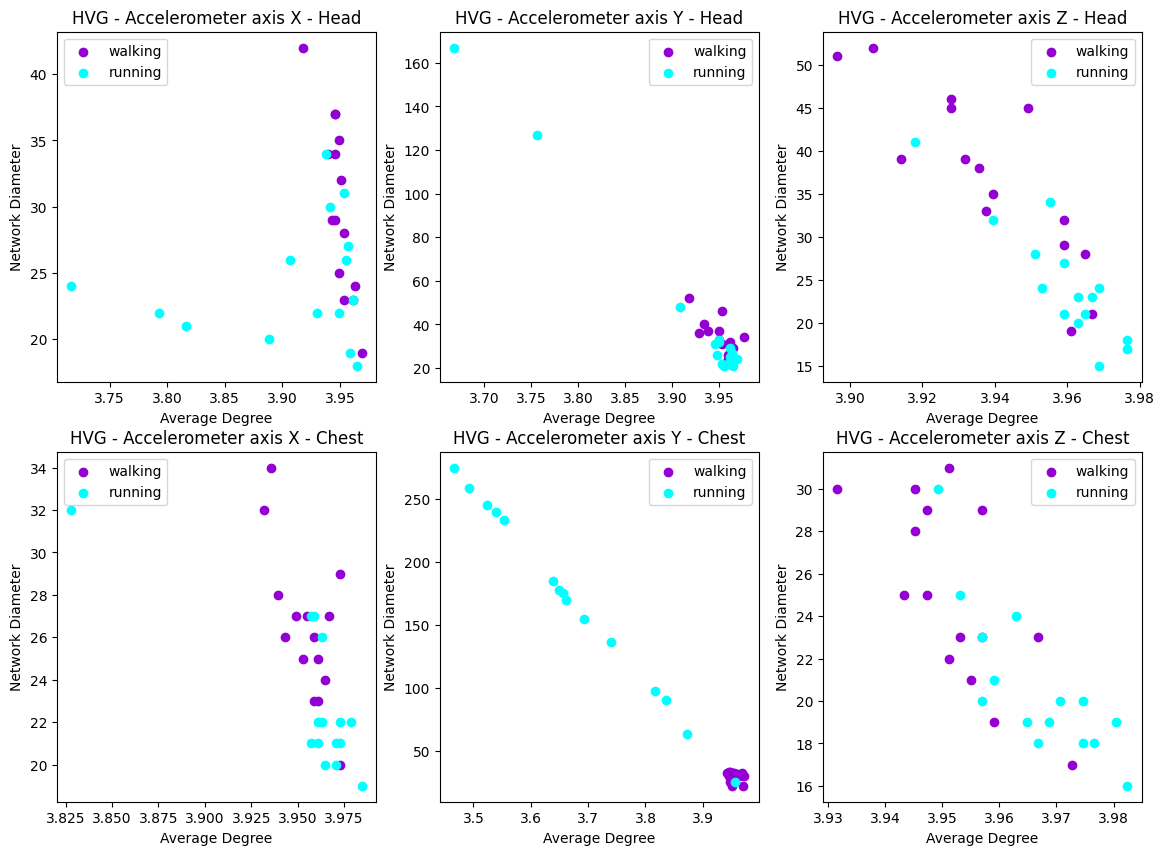

In [19]:
# 1] HVG - WALKING RUNNING 

# Define the groups of axis that to plot together
groups = [('x', 'HVG', 'head'), ('y', 'HVG', 'head'), ('z', 'HVG', 'head'),
          ('x', 'HVG', 'chest'), ('y', 'HVG', 'chest'), ('z', 'HVG', 'chest')]

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Flatten the axs array to make it easier to loop over
axs = axs.flatten()

# Define a list of colors for each activity
colors = ['darkviolet', 'aqua']

# Loop through each group of axis
for i, (axis, method, location) in enumerate(groups):
    # Filter the DataFrame for the current signal, method, and location
    filtered_df = result_dataframe[(result_dataframe['Accelerometer_axis'] == axis) & (result_dataframe['Method'] == method) & (result_dataframe['Location'] == location)]
            
    # Loop through each activity and its corresponding color
    for j, (activity, color) in enumerate(zip(['walking', 'running'], colors)):
        # Filter the DataFrame for the current activity
        activity_df = filtered_df[filtered_df['Activity'].str.contains(activity)]
                
        # Scatter plot of average degree vs. network diameter with the specified color
        axs[i].scatter(activity_df['Average_Degree'], activity_df['Network_Diameter'], label=activity, color=color)
            
    # Set the title and axis labels
    axs[i].set_title(f'{method} - Accelerometer axis {axis.upper()} - {location.capitalize()}')
    axs[i].set_xlabel('Average Degree')
    axs[i].set_ylabel('Network Diameter')
            
    # Add a legend
    axs[i].legend()

PLOT 2 : HVG CLIMBING UP AND CLIMBING DOWN

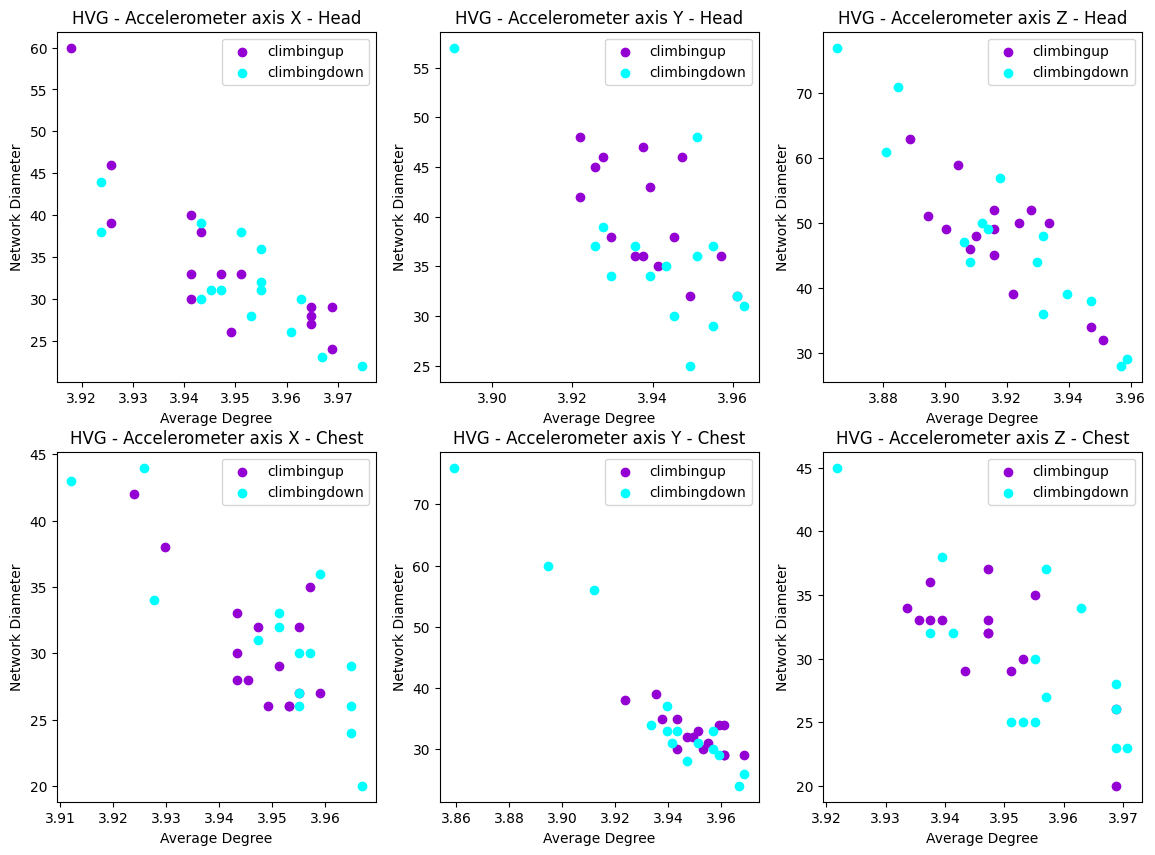

In [20]:
# 2] HVG - CLIMBING UP CLIMBING DOWN


# Define the groups of axis to plot together
groups = [('x', 'HVG', 'head'), ('y', 'HVG', 'head'), ('z', 'HVG', 'head'),
          ('x', 'HVG', 'chest'), ('y', 'HVG', 'chest'), ('z', 'HVG', 'chest')]

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Flatten the axs array to make it easier to loop over
axs = axs.flatten()

# Define a list of colors for each activity
colors = ['darkviolet', 'aqua']

# Loop through each group of axis
for i, (axis, method, location) in enumerate(groups):
    # Filter the DataFrame for the current signal, method, and location
    filtered_df = result_dataframe[(result_dataframe['Accelerometer_axis'] == axis) & (result_dataframe['Method'] == method) & (result_dataframe['Location'] == location)]
            
    # Loop through each activity and its corresponding color
    for j, (activity, color) in enumerate(zip(['climbingup', 'climbingdown'], colors)):
        # Filter the DataFrame for the current activity
        activity_df = filtered_df[filtered_df['Activity'].str.contains(activity)]
                
        # Scatter plot of average degree vs. network diameter with the specified color
        axs[i].scatter(activity_df['Average_Degree'], activity_df['Network_Diameter'], label=activity, color=color)
            
    # Set the title and axis labels
    axs[i].set_title(f'{method} - Accelerometer axis {axis.upper()} - {location.capitalize()}')
    axs[i].set_xlabel('Average Degree')
    axs[i].set_ylabel('Network Diameter')
            
    # Add a legend
    axs[i].legend()

### Method - NVG

PLOT 3 : NVG WALKING AND RUNNING

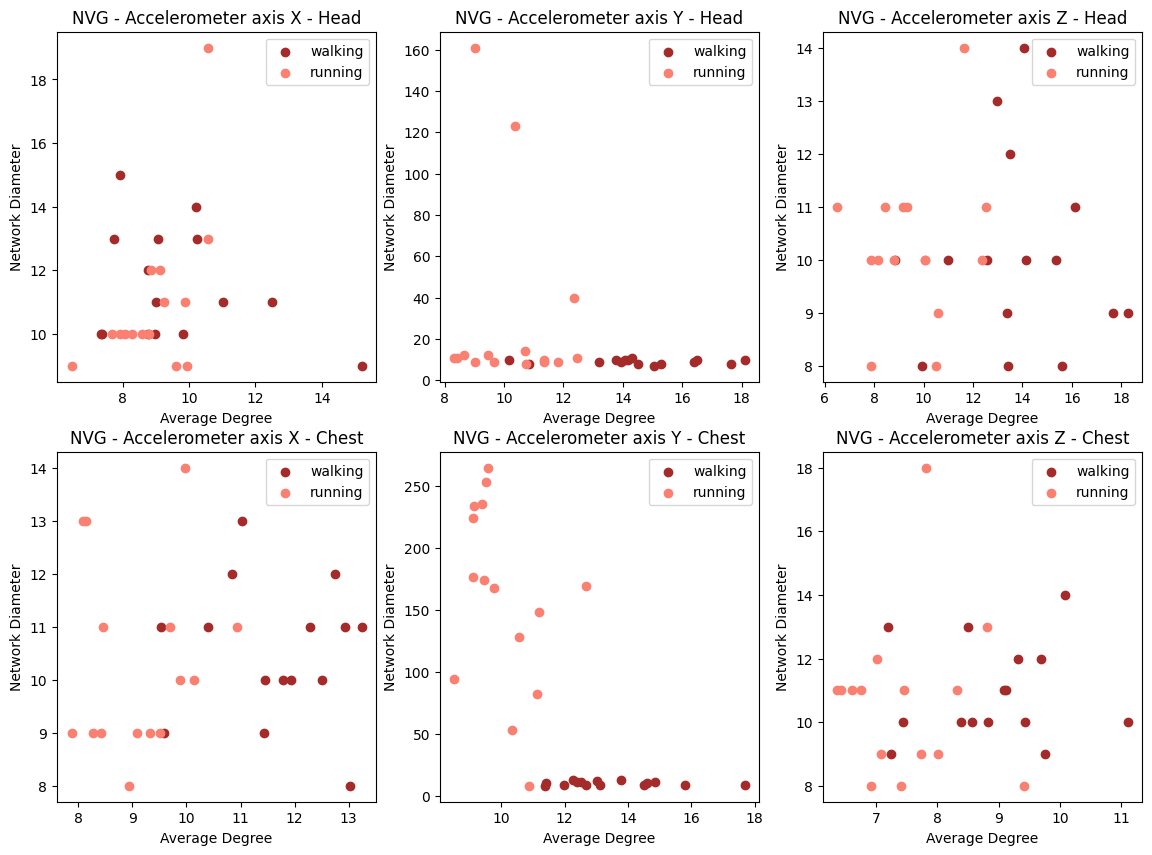

In [21]:
# 3] NVG - WALKING RUNNING 

# Define the groups of axis to plot together
groups = [('x', 'NVG', 'head'), ('y', 'NVG', 'head'), ('z', 'NVG', 'head'),
          ('x', 'NVG', 'chest'), ('y', 'NVG', 'chest'), ('z', 'NVG', 'chest')]

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Flatten the axs array to make it easier to loop over
axs = axs.flatten()

# Define a list of colors for each activity
colors = ['brown', 'salmon']

# Loop through each group of axis
for i, (axis, method, location) in enumerate(groups):
    # Filter the DataFrame for the current signal, method, and location
    filtered_df = result_dataframe[(result_dataframe['Accelerometer_axis'] == axis) & (result_dataframe['Method'] == method) & (result_dataframe['Location'] == location)]
            
    # Loop through each activity and its corresponding color
    for j, (activity, color) in enumerate(zip(['walking', 'running'], colors)):
        # Filter the DataFrame for the current activity
        activity_df = filtered_df[filtered_df['Activity'].str.contains(activity)]
                
        # Scatter plot of average degree vs. network diameter with the specified color
        axs[i].scatter(activity_df['Average_Degree'], activity_df['Network_Diameter'], label=activity, color=color)
            
    # Set the title and axis labels
    axs[i].set_title(f'{method} - Accelerometer axis {axis.upper()} - {location.capitalize()}')
    axs[i].set_xlabel('Average Degree')
    axs[i].set_ylabel('Network Diameter')
            
    # Add a legend
    axs[i].legend()

PLOT 4 : NVG CLIMBING UP AND CLIMBING DOWN

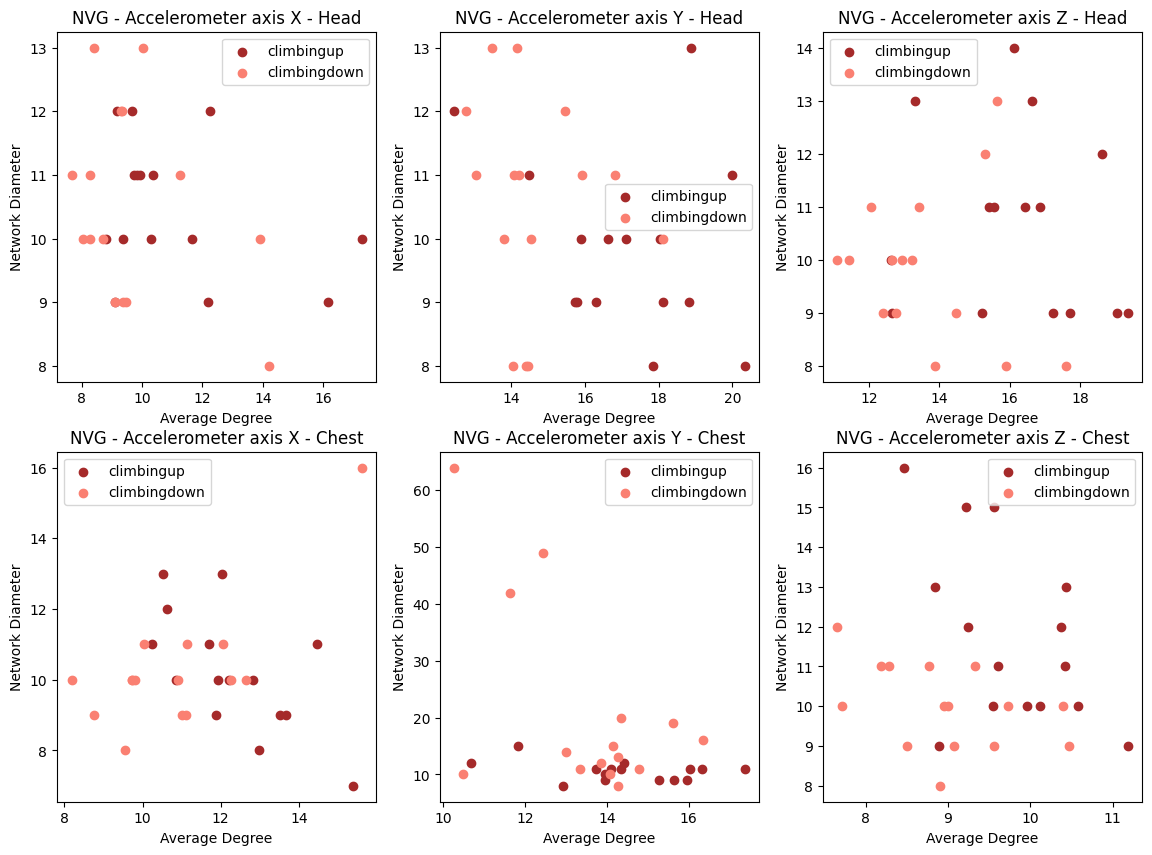

In [22]:
#4] NVG - CLIMBING UP CLIMBING DOWN

# Define the groups of axis plot together
groups = [('x', 'NVG', 'head'), ('y', 'NVG', 'head'), ('z', 'NVG', 'head'),
          ('x', 'NVG', 'chest'), ('y', 'NVG', 'chest'), ('z', 'NVG', 'chest')]

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Flatten the axs array to make it easier to loop over
axs = axs.flatten()

# Define a list of colors for each activity
colors = ['brown', 'salmon']

# Loop through each group of axis
for i, (axis, method, location) in enumerate(groups):
    # Filter the DataFrame for the current signal, method, and location
    filtered_df = result_dataframe[(result_dataframe['Accelerometer_axis'] == axis) & (result_dataframe['Method'] == method) & (result_dataframe['Location'] == location)]
            
    # Loop through each activity and its corresponding color
    for j, (activity, color) in enumerate(zip(['climbingup', 'climbingdown'], colors)):
        # Filter the DataFrame for the current activity
        activity_df = filtered_df[filtered_df['Activity'].str.contains(activity)]
                
        # Scatter plot of average degree vs. network diameter with the specified color
        axs[i].scatter(activity_df['Average_Degree'], activity_df['Network_Diameter'], label=activity, color=color)
            
    # Set the title and axis labels
    axs[i].set_title(f'{method} - Accelerometer axis {axis.upper()} - {location.capitalize()}')
    axs[i].set_xlabel('Average Degree')
    axs[i].set_ylabel('Network Diameter')
            
    # Add a legend
    axs[i].legend()

# Task 2 



In [ ]:
pip install pyentrp

In [ ]:
#importing packages
import numpy as np
import pandas as pd
from pyentrp import entropy as ent
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ordpy

### Reading the dataset

accessed the csv files locally from the system 

In [ ]:
#Storing the common filenames in each subject folder
filenames_chest = ['acc_climbingdown_chest.csv','acc_climbingup_chest.csv',
                   'acc_running_chest.csv','acc_walking_chest.csv']

filenames = ['acc_climbingdown_csv','acc_climbingup_csv',
                   'acc_running_csv','acc_walking_csv']

#Creating a list to store subject names
subjects = ['Subject'+ str(i) for i in range(1,16)]

#Storing activities as well to add a column to every dataset
activities = ['climbingdown', 'climbingup', 'running', 'walking']

#Creating empty lists
chest_dfs = []
head_dfs = []

filenames_head = ['acc_climbingdown_head.csv','acc_climbingup_head.csv',
                  'acc_running_head.csv','acc_walking_head.csv']

#Iterating through every subject folder and then through every file and reading it.
#After reading the file and saving it into dataframe, columns Subject and Activity are added to the dataframe.

#chest
for s in subjects:
    file_counter = 0
    for f in filenames:
        #print(file_counter)
        temp = str(filenames_chest[file_counter])
        path = os.path.join(s, f, temp)
       # print(path)
        if file_counter < 3:
            file_counter += 1
        for activity in activities:
            if activity in path:
                #print(path)
                chest_df = pd.read_csv(path, index_col= 'id')
                chest_df['Subject'] = s
                chest_df['Activity'] = activity
                chest_dfs.append(chest_df)
            

In [ ]:
#head
for s in subjects:
    file_counter = 0
    for f in filenames:
        #print(file_counter)
        temp = str(filenames_head[file_counter])
        path = os.path.join(s, f, temp)
        #print(path)
        if file_counter < 3:
            file_counter += 1
        for activity in activities:
            if activity in path:
                #print(path)
                head_df = pd.read_csv(path, index_col= 'id')
                head_df['Subject'] = s
                head_df['Activity'] = activity
                head_dfs.append(head_df)
            

In [ ]:
#Creating an empty dataframe to store all chest data
chest_data = pd.DataFrame()

signal_length = [1024,2048,4096]
dimension = [3,4,5,6]
delay = [1,2,3]
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the chest_data
for df in chest_dfs:
    for axis in axis_names:
        for s_len in signal_length:
            df = df[0:s_len]
            for embd_dim in dimension: 
                for tau in delay:
                    axis_pe, axis_complexity = ordpy.complexity_entropy(df[axis], dx=embd_dim, taux=tau)
                    chest_dict = {'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                                  'Signal length':s_len, 'Dimension on':embd_dim, 'Delay':tau,
                                  'Permutation Entropy': axis_pe, 'Complexity': axis_complexity,
                                  'Activity': df['Activity'].unique()[0]}
                    df_dictionary = pd.DataFrame([chest_dict])
                    chest_data = pd.concat([chest_data, df_dictionary], ignore_index=True)
                
   

### Permutation Entropy and Complexity for Chest

In [ ]:
chest_data['Accelerometer axis'] = chest_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})
chest_data

,Subject,Accelerometer axis,Signal length,Dimension on,Delay,Permutation Entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.865585,0.112619,climbingdown
1,Subject1,x,1024,3,2,0.960464,0.036433,climbingdown
2,Subject1,x,1024,3,3,0.985454,0.013861,climbingdown
3,Subject1,x,1024,4,1,0.808446,0.187779,climbingdown
4,Subject1,x,1024,4,2,0.937031,0.073560,climbingdown
...,...,...,...,...,...,...,...,...
6475,Subject15,z,4096,5,2,0.919208,0.137694,walking
6476,Subject15,z,4096,5,3,0.959984,0.070839,walking
6477,Subject15,z,4096,6,1,0.740326,0.401931,walking
6478,Subject15,z,4096,6,2,0.871989,0.287190,walking


In [ ]:
#Creating an empty dataframe to store all head data
head_data = pd.DataFrame()

signal_length = [1024,2048,4096]
dimension = [3,4,5,6]
delay = [1,2,3]
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the head_data
for df in head_dfs:
    for axis in axis_names:
        for s_len in signal_length:
            df = df[0:s_len]
            for embd_dim in dimension: 
                for tau in delay:
                    axis_pe, axis_complexity = ordpy.complexity_entropy(df[axis], dx=embd_dim, taux=tau)
                    head_dict = {'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                                  'Signal length':s_len, 'Dimension on':embd_dim, 'Delay':tau,
                                  'Permutation Entropy': axis_pe, 'Complexity': axis_complexity,
                                  'Activity': df['Activity'].unique()[0]}
                    df_dictionary = pd.DataFrame([head_dict])
                    head_data = pd.concat([head_data, df_dictionary], ignore_index=True)
                

### Permutation Entropy and Complexity for Head

In [ ]:
head_data['Accelerometer axis'] = head_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})
head_data

,Subject,Accelerometer axis,Signal length,Dimension on,Delay,Permutation Entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.859282,0.117177,climbingdown
1,Subject1,x,1024,3,2,0.945877,0.049096,climbingdown
2,Subject1,x,1024,3,3,0.976477,0.021966,climbingdown
3,Subject1,x,1024,4,1,0.801931,0.185327,climbingdown
4,Subject1,x,1024,4,2,0.912548,0.104322,climbingdown
...,...,...,...,...,...,...,...,...
6475,Subject15,z,4096,5,2,0.838532,0.230712,walking
6476,Subject15,z,4096,5,3,0.918550,0.132350,walking
6477,Subject15,z,4096,6,1,0.709921,0.402486,walking
6478,Subject15,z,4096,6,2,0.794801,0.369925,walking


### scatter plots for walking and running

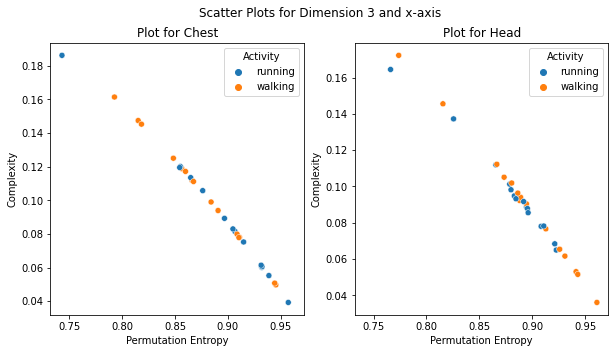

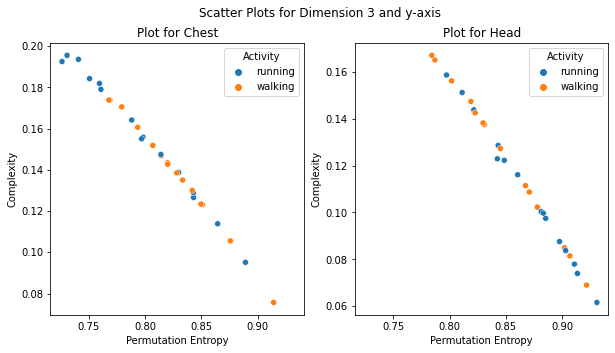

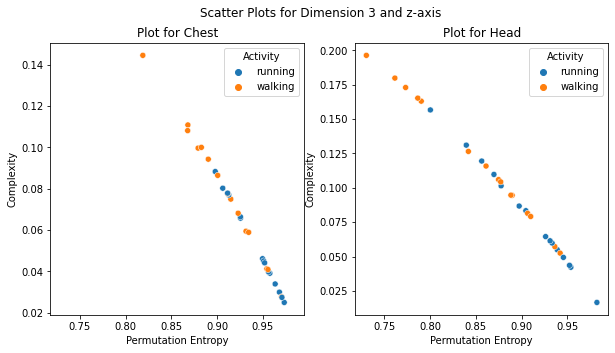

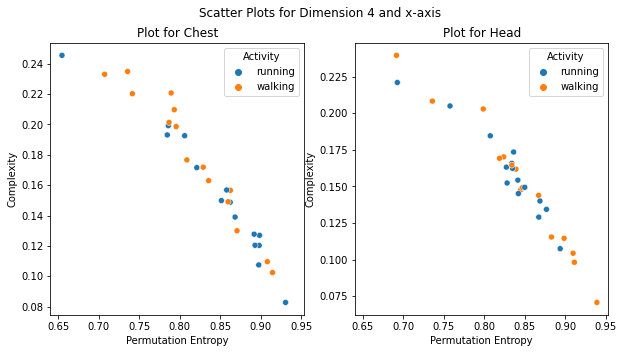

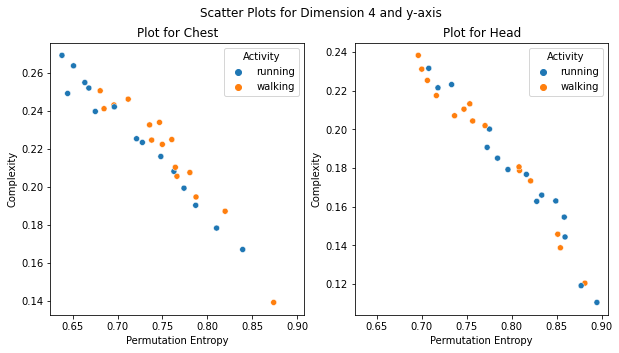

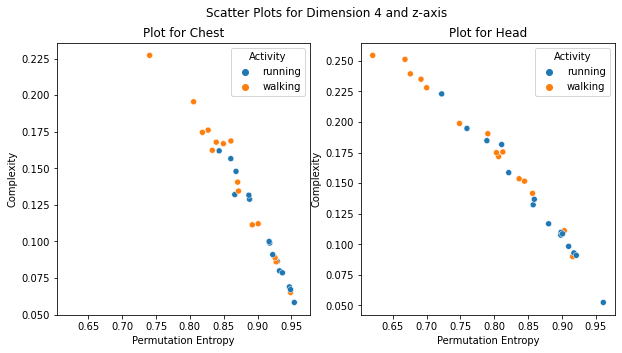

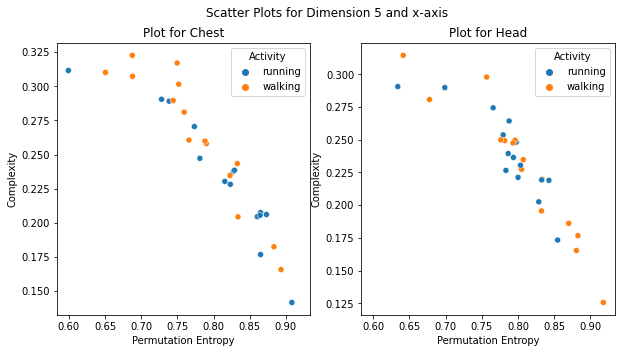

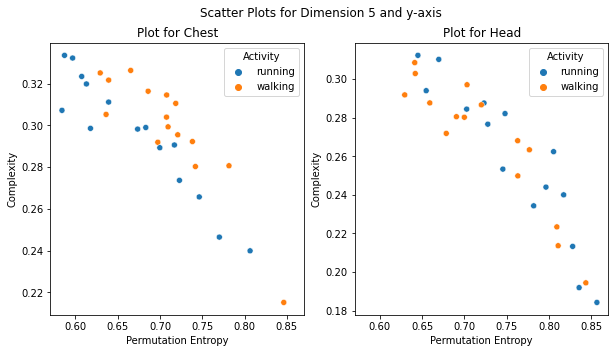

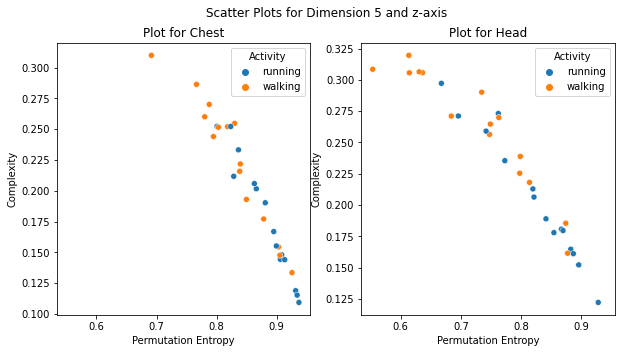

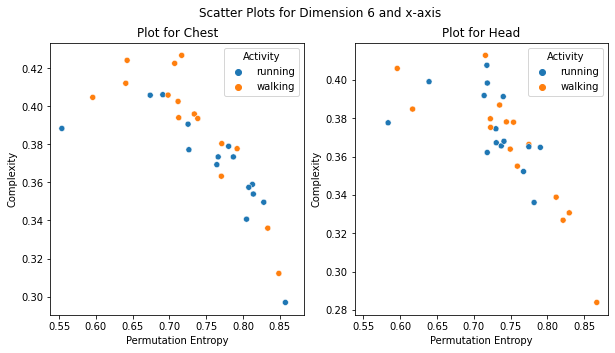

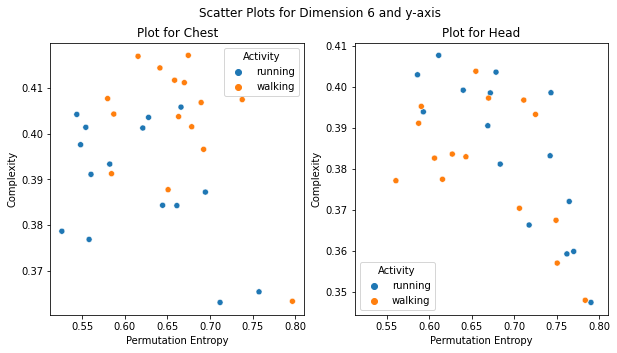

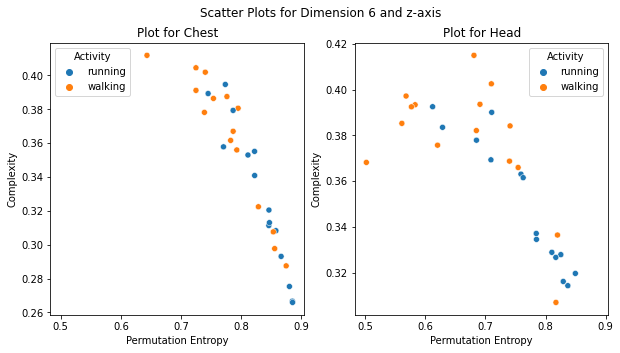

In [ ]:
#Varyinig dimensions for all 3 directions 
directions = ['x','y','z']
for i in range(3,7):
    for d in directions:
        #filetring data
        chest_data1 = chest_data[(chest_data['Signal length']==4096) &
                             (chest_data['Delay']==1) & 
                             (chest_data['Dimension on']==i) &
                             (chest_data['Accelerometer axis']==d) &
                             (chest_data['Activity'].isin(['walking','running']))]
        head_data1 = head_data[(head_data['Signal length']==4096) &
                             (head_data['Delay']==1) & 
                              (head_data['Dimension on']==i) &
                              (head_data['Accelerometer axis']==d) &
                              (head_data['Activity'].isin(['walking','running']))]
        chest_data1.reset_index(inplace=True)
        head_data1.reset_index(inplace=True)
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
        fig.suptitle(f'Scatter Plots for Dimension {i} and {d}-axis')

        sns.scatterplot(ax=axes[0], x=chest_data1['Permutation Entropy'], 
                        y=chest_data1['Complexity'],hue= chest_data1['Activity'])
        axes[0].set_title('Plot for Chest')

        sns.scatterplot(ax=axes[1], x=head_data1['Permutation Entropy'],
                        y=head_data1['Complexity'],hue= head_data1['Activity'])
        axes[1].set_title('Plot for Head')

### scatter plots for climbing up and climbing down

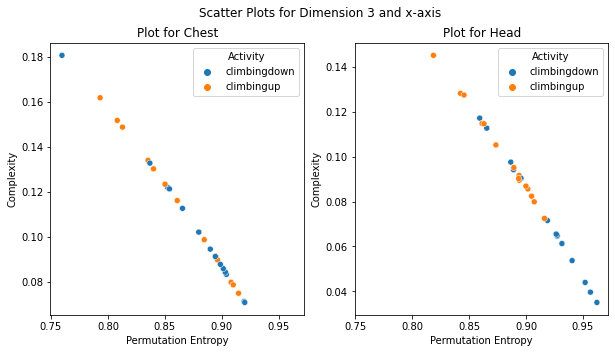

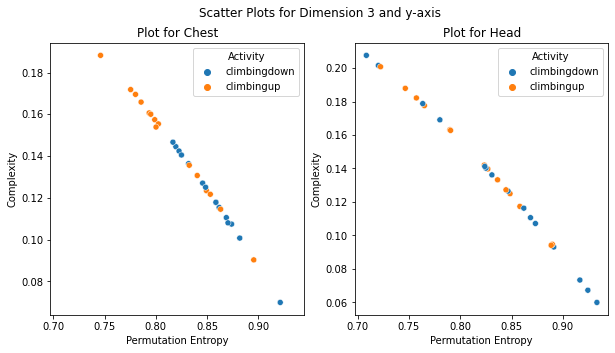

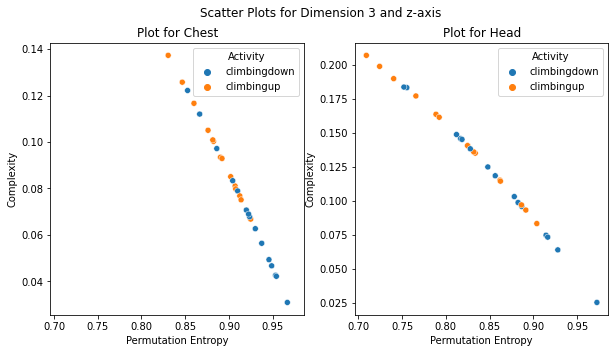

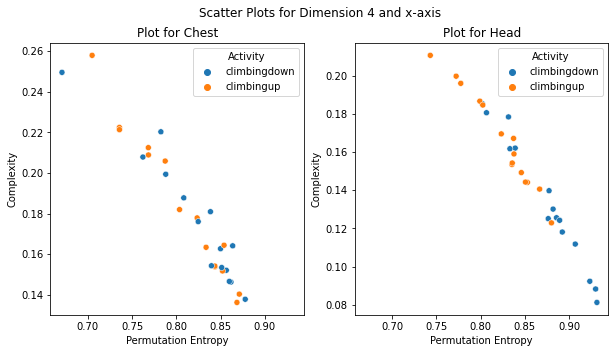

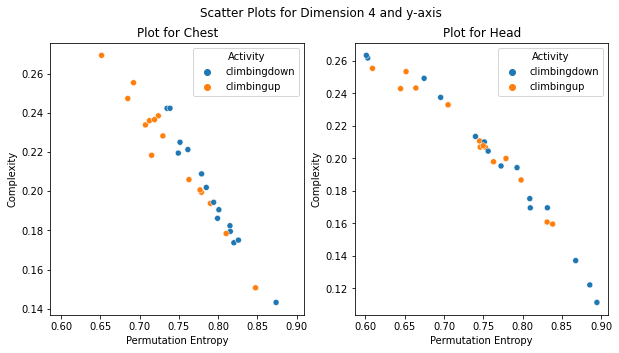

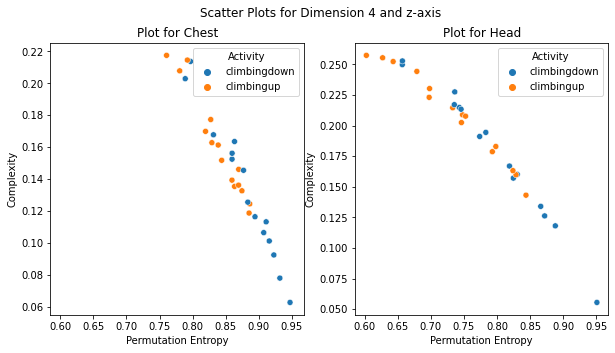

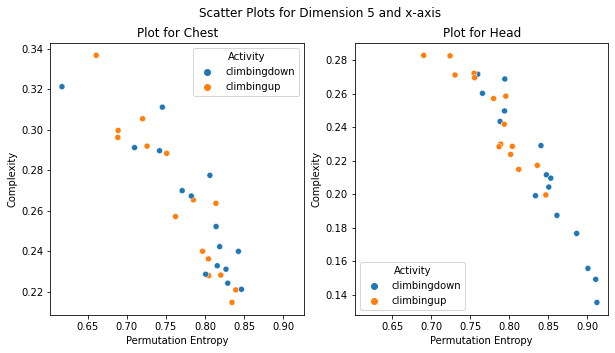

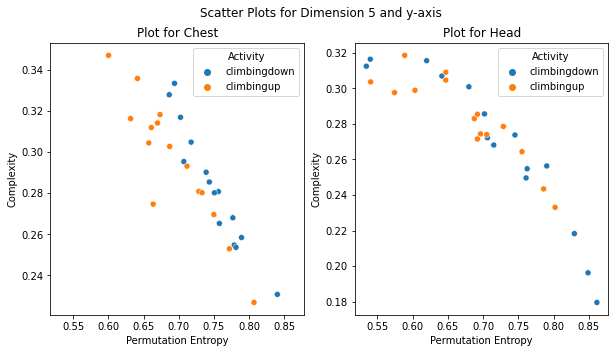

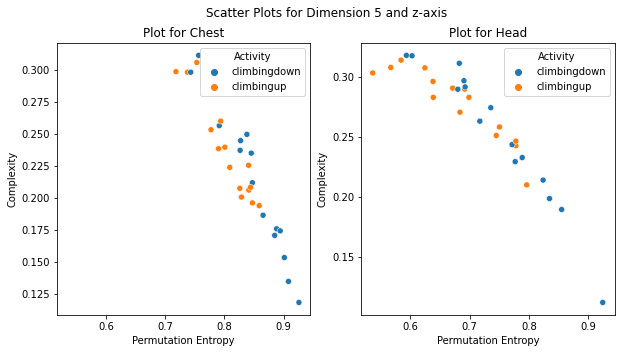

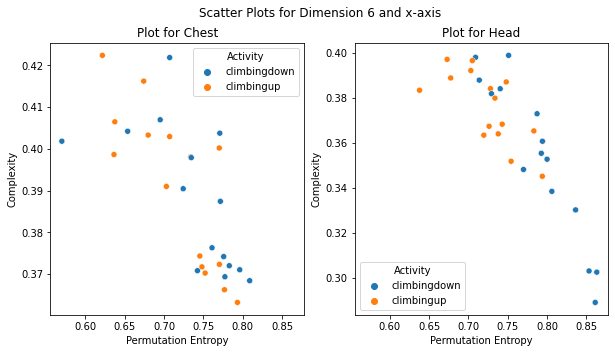

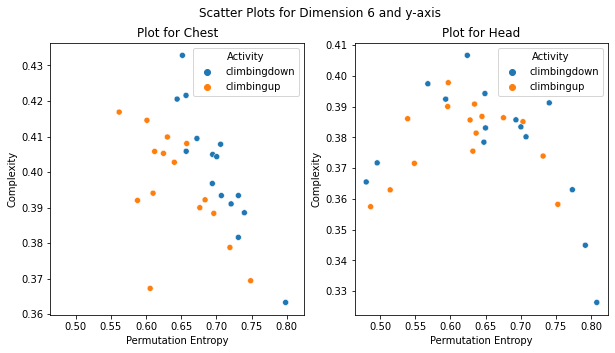

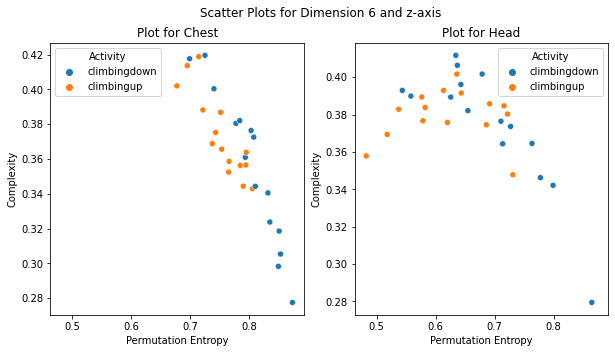

In [ ]:
#Varyinig dimensions for all 3 directions 
directions = ['x','y','z']
for i in range(3,7):
    for d in directions:
        chest_data1 = chest_data[(chest_data['Signal length']==4096) &
                             (chest_data['Delay']==1) & 
                             (chest_data['Dimension on']==i) &
                             (chest_data['Accelerometer axis']==d) &
                             (chest_data['Activity'].isin(['climbingup','climbingdown']))]
        head_data1 = head_data[(head_data['Signal length']==4096) &
                             (head_data['Delay']==1) & 
                              (head_data['Dimension on']==i) &
                              (head_data['Accelerometer axis']==d) &
                              (head_data['Activity'].isin(['climbingup','climbingdown']))]
        chest_data1.reset_index(inplace=True)
        head_data1.reset_index(inplace=True)
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
        fig.suptitle(f'Scatter Plots for Dimension {i} and {d}-axis')
    #     print(f'Scatter Plots for Dimension {i} and x-axis')
        sns.scatterplot(ax=axes[0], x=chest_data1['Permutation Entropy'], 
                        y=chest_data1['Complexity'],hue= chest_data1['Activity'])
        axes[0].set_title('Plot for Chest')

        sns.scatterplot(ax=axes[1], x=head_data1['Permutation Entropy'],
                        y=head_data1['Complexity'],hue= head_data1['Activity'])
        axes[1].set_title('Plot for Head')